In [1]:
import numpy as np
import scipy

import torch
from torch.utils.data import DataLoader

import librosa
from hyperparameters import *

from custom_datasets import MelCelebDataset
from preprocessing import melspectrogram

from IPython.display import Audio
from matplotlib import pyplot as plt

from tqdm import tqdm_notebook as tqdm

from VGGish import vggish

import warnings
warnings.filterwarnings('ignore')

In [2]:
def random_crop(x, crop_size=96):
    i = np.random.randint(0, x.shape[1] - crop_size)
    return x[:, i:i+crop_size]


def show(audio):
    display(Audio(audio, rate=SAMPLE_RATE))

In [3]:
data = MelCelebDataset(MEL_DATA_PATH, 'train')

In [4]:
data[0][0]

tensor([[0.4853, 0.4738, 0.3986,  ..., 0.4890, 0.4494, 0.4447],
        [0.4155, 0.4432, 0.3755,  ..., 0.4327, 0.4341, 0.4588],
        [0.2553, 0.3909, 0.4167,  ..., 0.5361, 0.5220, 0.4629],
        ...,
        [0.3100, 0.3006, 0.3565,  ..., 0.3075, 0.3505, 0.3427],
        [0.3015, 0.2762, 0.2958,  ..., 0.3038, 0.3704, 0.3777],
        [0.3020, 0.2725, 0.2768,  ..., 0.3035, 0.3155, 0.3023]])

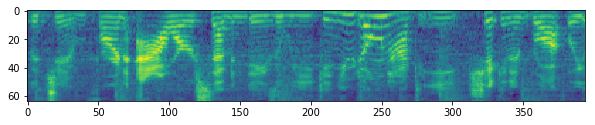

In [5]:
plt.figure(figsize=[10, 3])
plt.imshow(data[0][0])

In [6]:
data_loader = DataLoader(data, batch_size=16, num_workers=16)

In [7]:
for i in tqdm(data_loader):
    pass

In [8]:
net = vggish(include_classifier=False, pretrained=True)

In [9]:
net

VGGish(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)

In [10]:
x = data[0][0].unsqueeze(0)
x, net(x).shape

(tensor([[[0.4853, 0.4738, 0.3986,  ..., 0.4890, 0.4494, 0.4447],
          [0.4155, 0.4432, 0.3755,  ..., 0.4327, 0.4341, 0.4588],
          [0.2553, 0.3909, 0.4167,  ..., 0.5361, 0.5220, 0.4629],
          ...,
          [0.3100, 0.3006, 0.3565,  ..., 0.3075, 0.3505, 0.3427],
          [0.3015, 0.2762, 0.2958,  ..., 0.3038, 0.3704, 0.3777],
          [0.3020, 0.2725, 0.2768,  ..., 0.3035, 0.3155, 0.3023]]]),
 torch.Size([1, 512, 4]))